In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Carga dos dados


In [7]:
# abrir dataset
df_pontuacao = pd.read_csv('./datasets/pontuacao.csv')

In [8]:
# checar estrutura dos dados
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [9]:
# visualizar dados
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


### EDA

In [10]:
# Medidas estatisticas
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

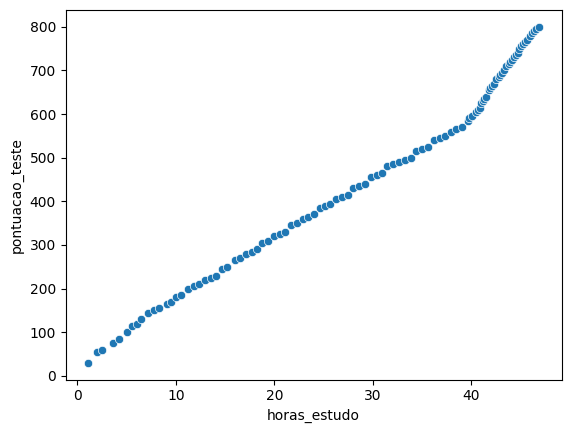

In [11]:
# plot de dispersao
# x = horas_estudo
# y = pontuacao_teste
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

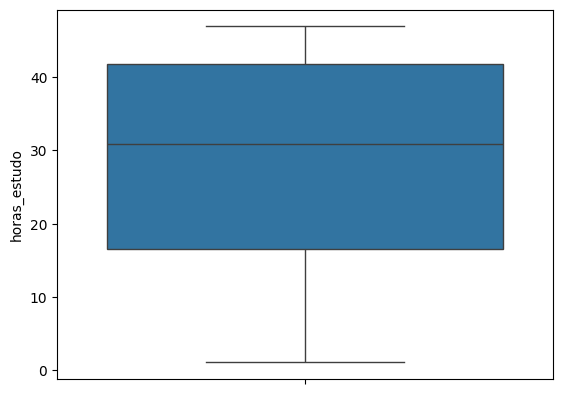

In [12]:
# outiliers
sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

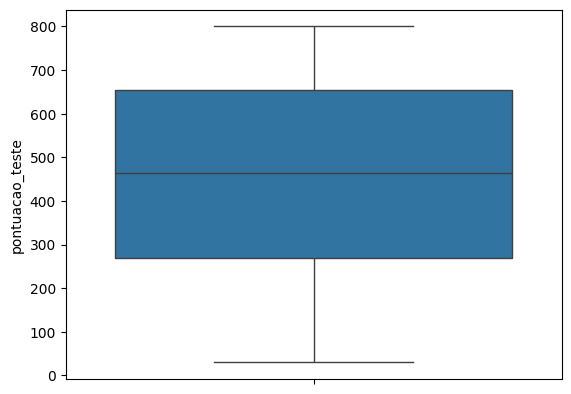

In [13]:
sns.boxplot(df_pontuacao, y='pontuacao_teste')

<Axes: >

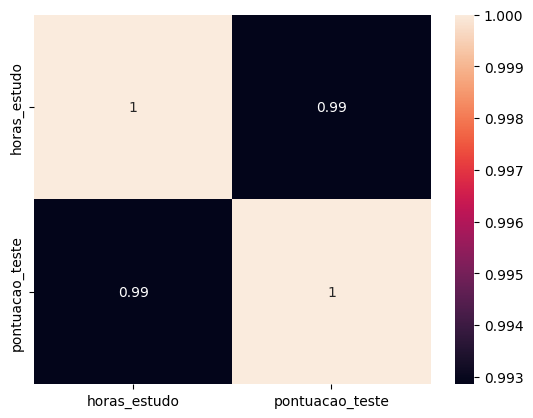

In [14]:
# correlaçao de pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

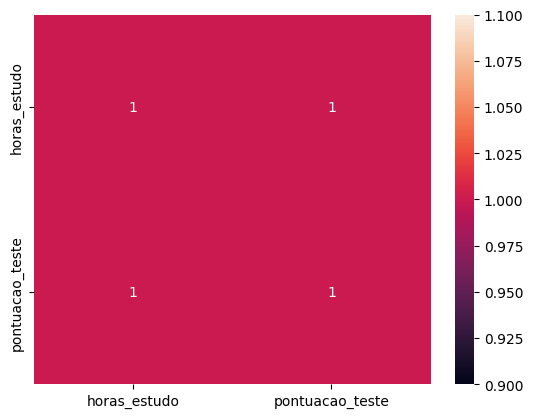

In [15]:
# correlaçao de spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

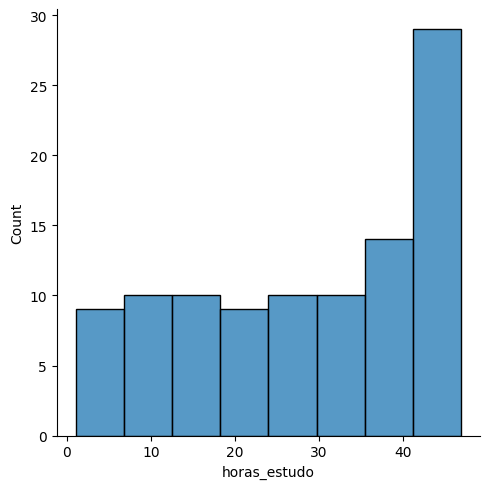

In [17]:
#histograma
sns.displot(df_pontuacao, x='horas_estudo')

### Treinar modelo

In [18]:
# dividir dataset entre treino e teste
X = df_pontuacao['horas_estudo'].values.reshape(-1,1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [19]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [20]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [21]:
# imprimir a equação da reta

print("a equação da reta é y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

a equação da reta é y = 15.642619x + 8.476601


### Validação do modelo 

In [22]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

In [23]:
# calcular metrica R-squared ou coeficiente de determinação
# R2 = representa a proporção da variação na variavel dependente q é explicada pela variavel independente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [25]:
r2_score(y_test, y_pred)

0.9828400452912442

In [26]:
# calcular metrica MAE 
# media entre Y_test e y_pred
# ele é uma metrica facil de interpretar
# é menos sensivel a outliers

mean_absolute_error(y_test, y_pred)


22.957470277134615

In [27]:
# calcular MSE
# tira media ao quadrado
# nao é uma metrica facild e interpretar
# é mais sensivel a aoutiliers e penaliza grandes erros

mean_squared_error(y_test, y_pred)

766.9972992416427

<Axes: >

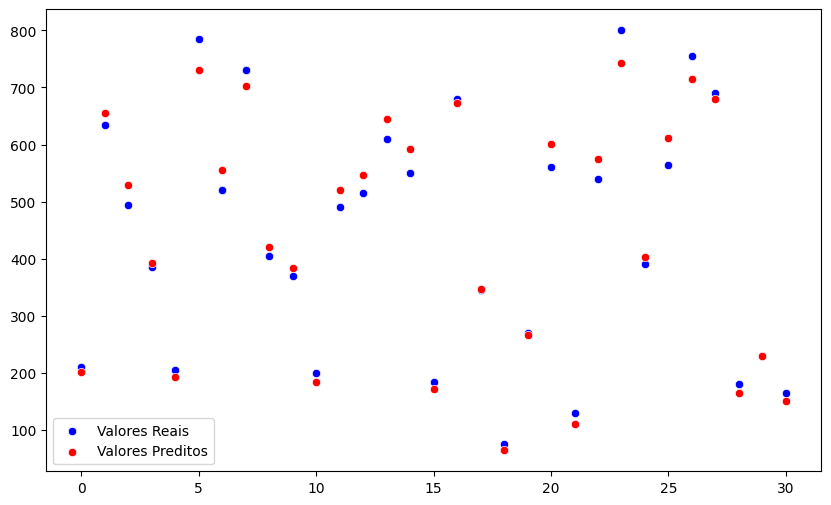

In [33]:
# analise grafica 
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')


### Analises de residuos

In [34]:
# calcular residuos
residuos = y_test - y_pred

In [35]:
# Calcular os residuos padronizados (standardization)
# para cada elemento de um conjunto (x - media) / desvio_padrao

from scipy.stats import zscore
residuos_std = zscore(residuos)

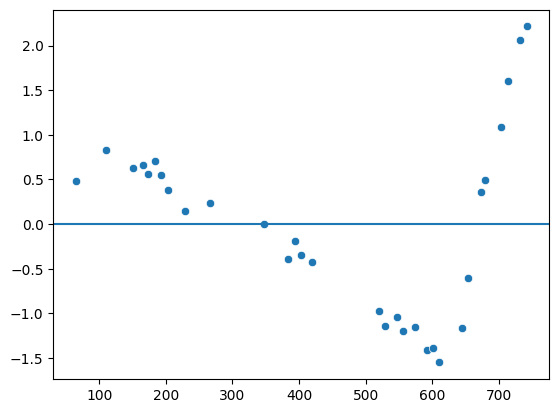

In [ ]:
# analise grafica dos residuos
# verificar linearidade do modelo
# se os residuos estiverem entre -2 e +2 na escaal padra isso indica linearidade
# Verificar a homogeneidade das variancias (homecedasticidade)
# Valores estiverem em torno da reta, temos homoce.. caso contrario 
# se tivermos alguma tendencia ou padrao formam um cone ou funil, ha uma heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

Text(0, 0.5, 'residuos na escala padrao')

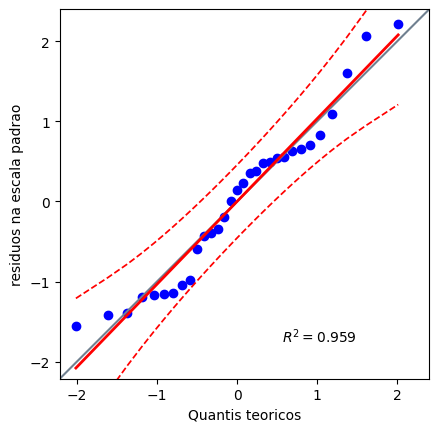

In [40]:
# segunda validação
# Checar se residuos seguem uma distribuição normal
#QQ Quantile plot, que avalia se uma amostra sgue uma distribuição normal
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis teoricos')
plt.ylabel('residuos na escala padrao')


In [42]:
# teste de normalidade - shapiro wilk
# h0 - segue distribuição normal
# h1 nao segue distribuição normal
# se o p-valor > 0.05 nao rejeita H0, caso contrario rejeitamos
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("estatistica do teste: {} e P-valor: {}".format(stat_shapiro, p_valor_shapiro))

estatistica do teste: 0.9500532226161759 e P-valor: 0.15663817850304973


In [43]:
# teste de normalidade - kolmogorov-smirnov
# h0 - segue distribuição normal
# h1 nao segue distribuição normal
# se o p-valor > 0.05 nao rejeita H0, caso contrario rejeitamos
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("estatistica do teste: {} e P-valor: {}".format(stat_ks, p_valor_ks))

estatistica do teste: 0.48355808450512827 e P-valor: 3.395368995814077e-07


### Fazer predições com o modelo

In [44]:
# se eu estudar 30.4 horas qual a pontuação prevista pelo modelo?
reg_model.predict([[30.4]])

array([[484.01220436]])

In [47]:
# quantas horas estudar para obter 600 pontos pelo modelo?
# y=ax + b
# y -b = ax
# (y-b) / a = x
# x = (y-b) / a
(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

np.float64(37.81485802710669)

### Salvar modelo para usar dps

In [48]:
import joblib
joblib.dump(reg_model, 'modelo_regressao.pkl')

['modelo_regressao.pkl']